### 前期准备

In [1]:
import os
import sys
 
# 1. 确定pkg_rootdir，即根据%pwd或os.getcwd()的结果截取出工程目录pkg_rootdir。
cur_dir = os.getcwd()
pkg_rootdir = os.path.dirname(cur_dir)  # *注意改为项目自定义包的根路径
# print(pkg_rootdir)
if pkg_rootdir not in sys.path:  # 解决ipynb引用上层路径中的模块时的ModuleNotFoundError问题
    sys.path.append(pkg_rootdir)
    print('-- Add root directory "{}" to system path.'.format(pkg_rootdir))
# 2. 在shell中启动jupyter服务：
print("For localhost developers:\nPlease start a jupyter servive with the bash command: jupyter notebook --allow-root --notebook-dir={pkg_rootdir}".format(pkg_rootdir=pkg_rootdir.replace("\\", "/")))
# 3. 切换kernel为jupyter notebook:
# 可在开发环境中切换kernel，或者直接在jupyter notebook上开发。
# 4. 推荐模板
# 推荐模板只需在使用python开发的自定义pkg最外层目录下的__init__.py中加入一次即可。如在示例中的D:/github_data/__init__py中加入一次即可。
# 推荐模板在[这里](https://blog.csdn.net/bird_fly_i/article/details/117739729)的文末。

# %pip list --format=freeze > ../python_v2/requirements.txt
%pip install -r ../python/requirements.txt

-- Add root directory "/home/node/notebook" to system path.
For localhost developers:
Please start a jupyter servive with the bash command: jupyter notebook --allow-root --notebook-dir=/home/node/notebook
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from python_v2.open_digger import openDigger

-- Add root directory "/home/node/notebook/python_v2" to system path.


In [23]:
import sys
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
baseDir = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(baseDir, 'python_v2'))
sys.path.append(os.path.join(baseDir, 'python_v2', 'metrics'))
sys.path.append(os.path.join(baseDir, 'python_v2', 'db'))
db_driver = openDigger.driver
_clickhouse = db_driver.clickhouse
_neo4j = db_driver.neo4j

repo_id_name = dict()
repo_id_name['65711522'] = "Paddle"
repo_id_name['262296122'] = "PaddleOCR"
repo_id_name['336274588'] = "PaddleNLP"
repo_id_name['217475193'] = "PaddleDetection"
repo_id_name['88868842'] = "models"
repo_id_name['204380779'] = "PaddleSeg"
repo_id_name['162672577'] = "PaddleHub"
repo_id_name['507861208'] = "FastDeploy"
repo_id_name['273214029'] = "PaddleGAN"
repo_id_name['228290594'] = "PaddleSlim"
repo_id_list = list(map(lambda x : int(x), repo_id_name.keys()))
repo_name_list = list(map(lambda x : str(x), repo_id_name.values()))

startYear = 2015
endYear = 2022

In [4]:
_clickhouse.queryDataframe(
    'SELECT * FROM system.tables;' 
)

,database,name,uuid,engine,is_temporary,data_paths,metadata_path,metadata_modification_time,dependencies_database,dependencies_table,...,total_rows,total_bytes,lifetime_rows,lifetime_bytes,comment,has_own_data,loading_dependencies_database,loading_dependencies_table,loading_dependent_database,loading_dependent_table
0,INFORMATION_SCHEMA,COLUMNS,00000000-0000-0000-0000-000000000000,View,0,[],,1970-01-01,[],[],...,NaN,NaN,None,None,,0,[],[],[],[]
1,INFORMATION_SCHEMA,SCHEMATA,00000000-0000-0000-0000-000000000000,View,0,[],,1970-01-01,[],[],...,NaN,NaN,None,None,,0,[],[],[],[]
2,INFORMATION_SCHEMA,TABLES,00000000-0000-0000-0000-000000000000,View,0,[],,1970-01-01,[],[],...,NaN,NaN,None,None,,0,[],[],[],[]
3,INFORMATION_SCHEMA,VIEWS,00000000-0000-0000-0000-000000000000,View,0,[],,1970-01-01,[],[],...,NaN,NaN,None,None,,0,[],[],[],[]
4,information_schema,columns,00000000-0000-0000-0000-000000000000,View,0,[],,1970-01-01,[],[],...,NaN,NaN,None,None,,0,[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,system,user_directories,e1406b3f-87b9-4d40-810e-a82b344a1771,SystemUserDirectories,0,[],/var/lib/clickhouse/store/3d6/3d69eb29-a674-41...,1970-01-01,[],[],...,NaN,NaN,None,None,,0,[],[],[],[]
84,system,users,f045a590-3ad3-4d05-ac3f-5f60e4c56959,SystemUsers,0,[],/var/lib/clickhouse/store/3d6/3d69eb29-a674-41...,1970-01-01,[],[],...,NaN,NaN,None,None,,0,[],[],[],[]
85,system,warnings,e3e41348-a89f-455d-b479-68d6236b31d9,SystemWarnings,0,[],/var/lib/clickhouse/store/3d6/3d69eb29-a674-41...,1970-01-01,[],[],...,NaN,NaN,None,None,,0,[],[],[],[]
86,system,zeros,6aaab58e-d445-4ecd-b97c-cebadf4ba5c7,SystemZeros,0,[],/var/lib/clickhouse/store/3d6/3d69eb29-a674-41...,1970-01-01,[],[],...,NaN,NaN,None,None,,0,[],[],[],[]


In [5]:
df = _clickhouse.queryDataframe(
    'SHOW TABLES FROM opensource' 
)
df

,name
0,events


### 社区日志总量比较

In [25]:

df = _clickhouse.queryDataframe(
    '''
    SELECT repo_id, COUNT() AS count, formatDateTime(created_at, '%Y') AS year
    FROM events 
    GROUP BY year,repo_id
    ORDER BY year,count
    '''
)

print(df) 
repo_names = list(map(lambda x: repo_id_name.get(str(x)),df.get('repo_id')))
df['community'] = repo_names
df = df.dropna()
df.to_csv('log_all.csv')

       repo_id  count  year
0     74094333      1  2016
1     76994289      2  2016
2     74094673      2  2016
3     74427002      8  2016
4     73922086     12  2016
..         ...    ...   ...
531  217475193   1486  2024
532  104208128   1645  2024
533  336274588   3746  2024
534  262296122   4772  2024
535   65711522  20796  2024

[536 rows x 3 columns]


### 每月成功 Merge 的 PR 数量

In [26]:
df = _clickhouse.queryDataframe(
    '''
    SELECT repo_id,COUNT(id) AS record_num, formatDateTime(created_at, '%Y-%m') AS year_month 
    FROM events 
    WHERE (type='PullRequestEvent' AND action='closed' AND pull_merged=1)
    GROUP BY repo_id, year_month
    ORDER BY year_month, record_num 
    DESC
    '''
)

print(df)
repo_names = list(map(lambda x: repo_id_name.get(str(x)),df.get('repo_id')))
df["community"] = repo_names
df = df.dropna()
df.to_csv('merge_all.csv')

        repo_id  record_num year_month
0      65711522          43    2016-11
1      65711522         144    2016-12
2      76616099           5    2016-12
3      75804012           2    2016-12
4      75261722           1    2016-12
...         ...         ...        ...
2306  312259012           1    2024-03
2307  427252454           1    2024-03
2308  513813137           1    2024-03
2309  273214029           1    2024-03
2310  228290594           1    2024-03

[2311 rows x 3 columns]


### 每月新增 Star 的数量

In [27]:
df = _clickhouse.queryDataframe(
    '''
    SELECT repo_id, countIf(type='WatchEvent') AS stars, formatDateTime(created_at, '%Y-%m') AS year_month
    FROM events 
    GROUP BY repo_id, year_month
    ORDER BY year_month, stars
    DESC
    '''
)
repo_names = list(map(lambda x: repo_id_name.get(str(x)),df.get('repo_id')))
df['community'] = repo_names
df = df.dropna()
df.to_csv('star_all.csv')

### 每月新增 Fork 的数量

In [28]:
df = _clickhouse.queryDataframe(
    '''
    SELECT repo_id, countIf(type='ForkEvent') AS forks, formatDateTime(created_at, '%Y-%m') AS year_month
    FROM events 
    GROUP BY repo_id, year_month
    ORDER BY year_month, forks
    DESC
    '''
)
repo_names = list(map(lambda x: repo_id_name.get(str(x)),df.get('repo_id')))
df['community'] = repo_names
df = df.dropna()
df.to_csv('fork_all.csv')

### 每月在仓库中活跃的不同开发者总数

In [29]:
df = _clickhouse.queryDataframe(
    '''
    SELECT repo_id, COUNT(DISTINCT actor_id) AS actor_count, formatDateTime(created_at, '%Y-%m') AS year_month
    FROM events
    WHERE type = 'PullRequestEvent'
    GROUP BY repo_id, year_month
    ORDER BY year_month, actor_count
    '''
)
repo_names = list(map(lambda x: repo_id_name.get(str(x)),df.get('repo_id')))
df['community'] = repo_names
df = df.dropna()
df.to_csv('activity_all.csv')

### 各个社区贡献者的数量占比

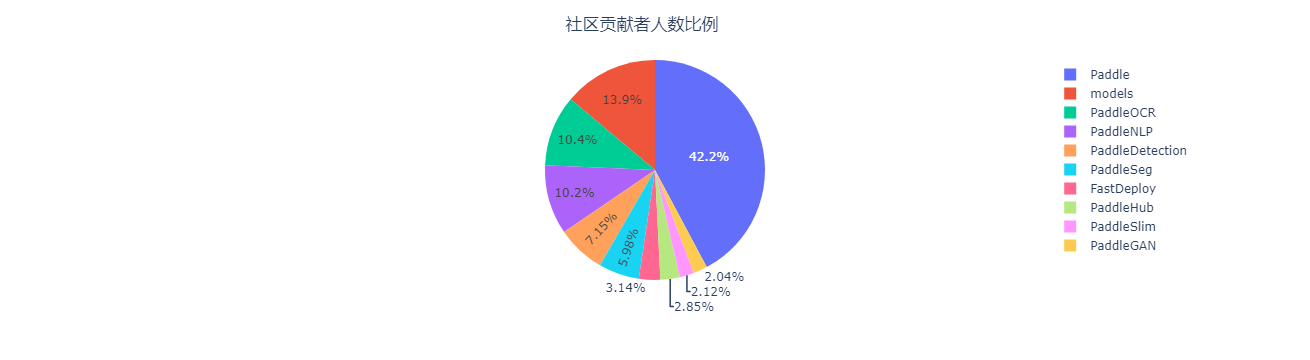

In [30]:
df = _clickhouse.queryDataframe(
    '''
    SELECT repo_id, COUNT(DISTINCT(arrayJoin(push_commits.name))) AS contributor_count 
    FROM events
    GROUP BY repo_id
    ORDER BY contributor_count
    DESC
    '''
)
repo_names = list(map(lambda x: repo_id_name.get(str(x)), df.get('repo_id')))
df['community'] = repo_names
df = df.dropna()
df.to_csv('contributor_all.csv')
fig = px.pie(df, names= "community",values="contributor_count")
fig.update_layout(
    title={   
        "text":"社区贡献者人数比例",
        "y":0.95,
        "x":0.49,
        "xanchor":"center",
        "yanchor":"top"
    }
)
fig.show()

### 每年各个社区 Star & Fork 数量对比

In [31]:
df = _clickhouse.queryDataframe(
    '''
    SELECT repo_id,SUM(CASE WHEN type = 'WatchEvent' THEN 1 ELSE 0 END) AS stars, SUM(CASE WHEN type = 'ForkEvent' THEN 1 ELSE 0 END) AS forks, formatDateTime(created_at, '%Y') AS year
    FROM events 
    WHERE type = 'WatchEvent' OR type = 'ForkEvent'
    GROUP BY repo_id, year
    ORDER BY  year,stars,forks 
    DESC
    '''
)
repo_names = list(map(lambda x: repo_id_name.get(str(x)),df.get('repo_id')))
repo_names = list(map(lambda x: repo_id_name.get(str(x)), df.get('repo_id')))
df['community'] = repo_names
df = df.dropna()
df.to_csv('star_and_fork.csv')